In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
root_dir = os.getcwd()
sys.path.append(root_dir)

In [5]:
from src import datatypes, definitions, electron_functions

In [26]:
def eval_wavefunction(n, l, m, resolution):
    radialdensity = datatypes.RadialElectronDensity(resolution=resolution)

    rr, pp, psps = np.meshgrid(radialdensity.density.coords["r"].data, radialdensity.density.coords["theta"].data, radialdensity.density.coords["psi"].data)
        
    result = electron_functions.wavefunction(n, l, m, rr, pp, psps)

    return result

[autoreload of src.datatypes failed: Traceback (most recent call last):
  File "/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 323, in update_instances
    object.__setattr__(ref, "__class__", new)
TypeError: __class__ assignment: 'RadialElectronDensity' object 

In [27]:
radialdensity = datatypes.RadialElectronDensity(resolution={"r": 25, "theta":25, "psi": 25})

x, y, z = electron_functions.convert_radial_to_cartesian(radialdensity.density.coords["r"].data, radialdensity.density.coords["theta"].data, radialdensity.density.coords["psi"].data)

rr, pp, psps = np.meshgrid(radialdensity.density.coords["r"].data, radialdensity.density.coords["theta"].data, radialdensity.density.coords["psi"].data)

xx, yy, zz = np.meshgrid(x, y, z)

KeyError: 'phi'

In [8]:
density = eval_wavefunction(2, 1, 1, {"r": 25, "phi":25, "psi": 25})

In [24]:
mask_d = density.clip(min=0.0000000005)

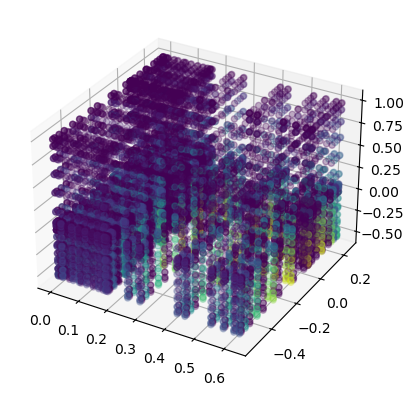

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(xs=xx, ys=yy, zs=zz, c=mask_d, alpha=0.3)

plt.show()

radialdensity = datatypes.RadialElectronDensity(resolution={"r": 100, "phi":100, "psi": 100})